# Learning outcomes
- Geometric transformation
    - rotations
    - translation
    - affine transformation
    - perspective transformation

- Some basic drawing functions
    - line
    - circle
    - ellipse
    - rectangle
    - text
    
- Bitwise operations
    - OR
    - XOR
    - AND
    - NOT

- Convolution : A sliding window perfomring linear combination.
    - Image smoothing (denoising)
    - Sharpening
    - at the heart of CNN
    - other effects
    

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

##### Transaction and locations are a special case of affine transform.
##### Affine transform is a special case of Perspecitve transform.


| Translation | Rotation | Affine Trans | Perspective trans |
| :-: | :-: | :-: | :-: |  
|  tx (moving left) | Trigonometry | 3 pairs of point from source and destination | 4 pair of points from source and destination |  | Straight line | Straight line |
|  ty (moving down) | a | Parallelism | Not Parallel |

###### Matrix must be a float

## Translation

In [2]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1, 0, tx],[0, 1, ty]])

dst = cv.warpAffine(img, M, (w+tx, h+ty))

show_img(f"translation tx: {tx}, ty:{ty}", dst)

## Rotation

In [3]:
# define M: center, angle, scale
yc, xc = h // 2, w // 2

angle = 90  # positive means anticlockwise

M = cv.getRotationMatrix2D((xc, yc), angle,1)
dst = cv.warpAffine(img, M, (w, h))

show_img("rotation", dst)

## Custom affine transform

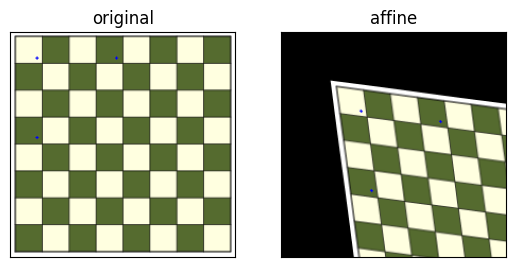

In [4]:
img = cv.imread("images/chessboard.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_copy = img.copy()

h, w = img.shape[:2]

p0 = np.float32([[25,25], [100, 25], [25, 100]])
p1 = np.float32([[75,75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
M = cv.getAffineTransform(p0, p1)
dst = cv.warpAffine(img, M, (w, h))

plt.subplot(121), plt_img(img, title="original")
plt.subplot(122), plt_img(dst, title="affine")
plt.show()

In [5]:
dst[75, 75, :] # To check whether the coodination of the blue dot is correct

array([  0,   0, 255], dtype=uint8)

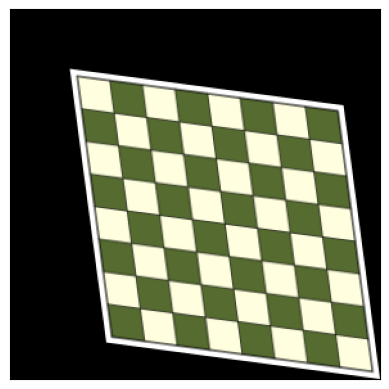

In [6]:
dst_new = cv.warpAffine(img_copy, M, (w+75, h+75))

plt_img(dst_new)

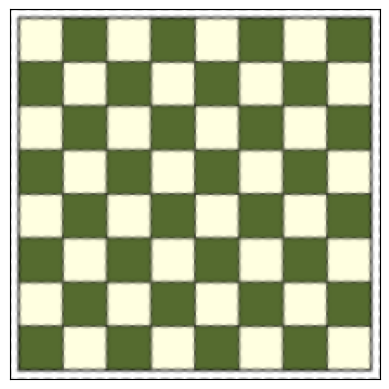

In [7]:
M_inv = cv.getAffineTransform(p1, p0)
ori_restored = cv.warpAffine(dst_new, M_inv, (w, h))

plt_img(ori_restored)

## Perspective transform

In [8]:
img = cv.imread("images/name_card_sample.webp")
img_copy = img.copy()
show_img("img", img, adjust = True)

In [9]:
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x,y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(117, 105)
(767, 43)
(914, 269)
(72, 386)


In [10]:
!pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\Acer\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [11]:
from scipy.spatial.distance import euclidean

In [12]:
# euclidean sqrt((x1-x2)**2 + (y1-y2)**2)

w1 = euclidean(p[0],p[1])
w2 = euclidean(p[2],p[3])

h1 = euclidean(p[0],p[3])
h2 = euclidean(p[1],p[2])

W = max(w1, w2) # whichever having the larger width will be the w
H = max(h1, h2)

p_arr = np.float32(p)
dst = np.float32([[0,0], [W-1, 0], [W-1, H-1], [0, H-1]]) #Coordinates of p0 - p3 accordingly

M = cv.getPerspectiveTransform(p_arr, dst)
warp = cv.warpPerspective(img_copy, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img_copy)
show_img("warp", warp)

## Exercise

In [13]:
img = cv.imread("images/dice.jfif")
img_copy = img.copy()
p = []
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(13, 65)
(75, 96)
(82, 134)
(17, 105)


In [14]:
w1 = euclidean(p[0],p[1])
w2 = euclidean(p[2],p[3])

h1 = euclidean(p[0],p[3])
h2 = euclidean(p[1],p[2])

W = max(w1, w2) # whichever having the larger width will be the w
H = max(h1, h2)

p_arr = np.float32(p)
dst = np.float32([[0,0], [W-1, 0], [W-1, H-1], [0, H-1]]) #Coordinates of p0 - p3 accordingly

M = cv.getPerspectiveTransform(p_arr, dst)
warp = cv.warpPerspective(img_copy, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img_copy)
show_img("warp", warp)

## Drawing functions


In [15]:

img = cv.imread("images/dog.jfif")

print(img.shape)

(168, 300, 3)


In [16]:
# line
img_copy = img.copy()

cv.line(img_copy, (30, 80), (150, 150), (0, 0, 255), 4, cv.LINE_AA) # start, end, color
show_img("line", img_copy)

In [17]:
# circle
img_copy = img.copy()

cv.circle(img_copy, (145, 50), 40, (0, 0, 255), 2, cv.LINE_AA) # coordinate, starting point
show_img("circle", img_copy)

In [18]:
# ellipse

img_copy = img.copy()
axes = (50, 25)
angle = 0

cv.ellipse(img_copy, (145, 50), axes, angle, 0, 360, (0, 0, 255), 4, cv.LINE_AA)
show_img("ellipse", img_copy)

In [19]:
# line
img_copy = img.copy()

cv.rectangle(img_copy, (30, 80), (150, 150), (0, 0, 255), 4, cv.LINE_AA) # start, end, color
show_img("line", img_copy)

In [20]:
# text
img_copy = img.copy()

cv.putText(img_copy, "I am a happy dog!", (15,145), cv.FONT_HERSHEY_SIMPLEX, 0.65, (200, 0, 50), 2)
show_img("line", img_copy)

### Create a custom drawing board
Make use of the trackbar function, mouse callback function.

In [21]:
WHITE = (255, 255, 255)
RED = (0, 0, 255)
GREEN = (0, 255, 0)
BLUE = (255, 0, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, GREEN, BLUE, CYAN, MAGENTA, YELLOW, WHITE)

# create a trackbar fucntion, mouse callback function, while loop to show the template

def nothing(x): # do nothing, grab the value from trackbar
    pass

p0 = p1 = (0,0)

def mouse(event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
    
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)
        
        d = cv.getTrackbarPos(tr1_name, wn)
        if d==0:
            d=-1
        i = cv.getTrackbarPos(tr2_name, wn)
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow(wn, img)
        
        
# Create the canvas
wn = "window"
tr1_name = "thickness"
tr2_name = "color"
img = np.zeros((400, 400, 3), dtype = np.uint8)
cv.namedWindow(wn)
cv.createTrackbar(tr1_name, wn, 0, 10, nothing)
cv.createTrackbar(tr2_name, wn, 0, 6, nothing)
cv.setMouseCallback(wn, mouse)

while (1):
    cv.imshow(wn, img)
    k = cv.waitKey(1) & 0xFF
    if k==27:
        break
    
    if k==ord("c"):
        img[:] = 0
        
cv.destroyAllWindows()

## BullEye

In [22]:
img = np.zeros((400, 400), dtype = np.uint8)
radius = np.arange(20, 200, 15)

for r in radius:
    cv.circle(img, (200, 200), r, 255, 2)

cv.putText(img, "Bulleye",(20, 375), cv.FONT_HERSHEY_SIMPLEX, 0.65, 255, 2)
show_img("image",img)

## Bitwise operations

In [23]:
rect = np.zeros((400, 400), np.uint8)
rect[30:370, 30:370] = 255

circle = np.zeros((400,400), np.uint8)
cv.circle(circle, (200,200), 200, 255, -1)

cv.imshow("rectangle",rect)
show_img("circle", circle)

In [24]:
# AND

res_AND = cv.bitwise_and(rect, circle)
show_img("AND", res_AND)

In [25]:
# OR

res_OR = cv.bitwise_or(rect, circle)
show_img("OR", res_OR)

In [26]:
# XOR

res_XOR = cv.bitwise_xor(rect, circle)
show_img("XOR", res_XOR)

In [27]:
# NOT

res_NOT = cv.bitwise_not(rect)
show_img("NOT", res_NOT)

In [28]:
img = cv.imread("images/dog.jfif")

h, w = img.shape[:2]

mask = np.zeros((h, w), dtype = np.uint8)

cv.circle(mask, (145, 50), 40, 255, -1)

res = cv.bitwise_and(img, img, mask=mask)

show_img("res", res)

## Convolution in action

In [29]:
# identity kernel

img = cv.imread("images/opencv_logo.png")

kernel = np.zeros((3,3))
kernel[1, 1] = 1
print(kernel)

dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("identity", dst)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [30]:
# sharpening kernel (sharpened = original + (original − blurred) × amount)

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")
dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("sharpen", dst)

In [31]:
# blur 

kernel = np.ones((5, 5)) / 25
blur = cv.filter2D(img, -1, kernel)
dst = cv.addWeighted(img, 1.6, blur, -0.6, 0)
show_img("unsharp_masking", dst)


4 functions to perform image blurring:
- `cv.blur` : mean average filter
- `cv.GaussianBlur` : Gaussian filter, suitable for gaussian noise
- `cv.medialFilter` : medial filter, useful to eliminate salt and pepper noise
- `cv.bilateralFilter` : edge-preserving filter

### Watermark (Week 4 Exercise 4)

In [32]:
watermark = cv.imread("Picture1.png")

show_img("Watermark", watermark)

In [33]:
watermark.shape

(126, 227, 3)

In [34]:
img = cv.imread("images/travel_hd.jpg")
img.shape

(6000, 4000, 3)

In [35]:
overlay = np.zeros_like(img)

h, w = img.shape[:2]
hW, wW = watermark.shape[:2]

overlay[h-hW-15:h-15, 15:15+wW] = watermark

In [36]:
watermarked_img = cv.addWeighted(img, 1, overlay, 0.4, 0)

show_img("watermark", watermarked_img, adjust=True)

### Weekly Activity

In [37]:
!pip install imutils


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\Acer\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [38]:
# Exercise 1
import imutils as im

img = cv.imread("images/lena.jfif")

rotated_img = im.rotate_bound(img, angle=-45)

show_img("rotation", rotated_img)

In [39]:
# Exercise 1.1
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
angle = 45

yc, xc = h // 2, w // 2

M = cv.getRotationMatrix2D((200, 80), angle, 1)
dst = cv.warpAffine(img, M, (w+yc, h+xc))

# M = np.float32([[1, 0, tx],[0, 1, ty]])
#dst_new = cv.warpAffine(dst, M, (w+150, h+150))

show_img("rotation", dst)

In [40]:
# Exercise 2

img = cv.imread("images/native-bee.png")
img2 = cv.imread("images/flower.jfif")

rows, cols, channels = img2.shape
roi = img[0:rows, 0:cols]

img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
#70 = intensity value of the pixel, to remove black bg, 255, maximum intensity value
ret, mask = cv.threshold(img2gray, 70, 255, cv.THRESH_BINARY) 
mask_inv = cv.bitwise_not(mask)

img_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

dst = cv.add(img_bg,img2_fg)
img[0:rows, 0:cols] = dst

show_img("result", img)
cv.waitKey(0)
cv.destroyAllWindows()

(<Axes: title={'center': 'normal'}>, None)

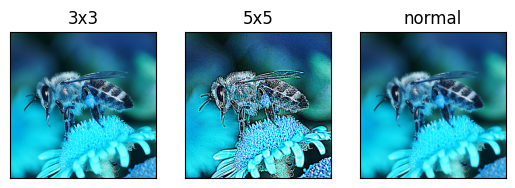

In [41]:
# Exercise 3

img = cv.imread("images/native-bee.png")

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel2 = np.array([[-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1],
                   [-1, -1, 25, -1, -1],
                   [-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1]])

dst = cv.filter2D(img, -1, kernel)
dst2 = cv.filter2D(img, -1, kernel2)

plt.subplot(131), plt_img(dst, "3x3") 
#sharpend wihtin the range of formula  (sharpened = original + (original − blurred) × amount), pic look obvious and clean
plt.subplot(132), plt_img(dst2, "5x5") 
#Way too much sharpend, consists of noise in the picture
plt.subplot(133), plt_img(img, "normal")

(<Axes: title={'center': 'median'}>, None)

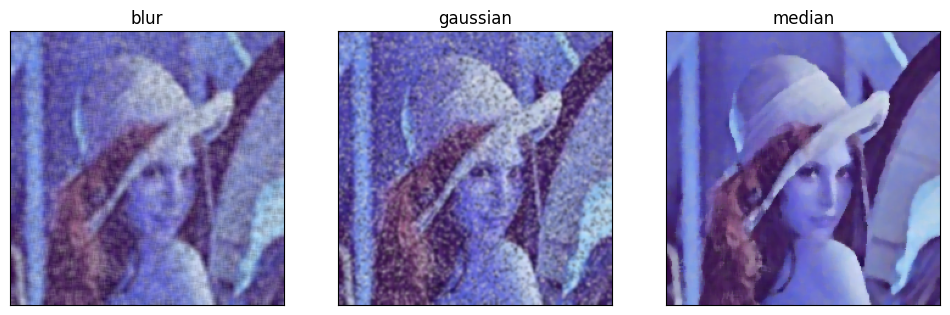

In [42]:
img = cv.imread("images/noise_lena.jpg")

blur_filtered = cv.blur(img, (5, 5))
gaussian_filtered = cv.GaussianBlur(img, (5, 5), 0)
median_filtered = cv.medianBlur(img, 5)

plt.figure(figsize=(12, 4))
           
plt.subplot(131), plt_img(blur_filtered, "blur") 
# blurry image just like not wearing glasses when having short/long sightedness, less noise compare to gaussian
# hard to see the details of the pic in general.
plt.subplot(132), plt_img(gaussian_filtered, "gaussian") 
# more sharper, the edges / lines and details are well maintainted, more clearer in general, 
# salt and pepper noise are very obvious.
plt.subplot(133), plt_img(median_filtered, "median")
# All of the noise (salt and pepper noise) removed effectively, able to see the picture without obstacles
# however details are not maintained.